In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-20 14:49:53--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.06s   

2025-10-20 14:49:53 (1.31 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In [3]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 10.5 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 10.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 5.9 MB/s eta 0:00:00


In [5]:
# Детальное исследование данных
print("=== ДЕТАЛЬНОЕ ИССЛЕДОВАНИЕ ДАННЫХ ===")

# 1. Проверим распределение целевой переменной
print("Распределение целевой переменной 'converted':")
print(data['converted'].value_counts(normalize=True))
print()

# 2. Проверим статистики числовых признаков
print("Статистики числовых признаков:")
print(data[['lead_score', 'number_of_courses_viewed', 'interaction_count', 'annual_income']].describe())
print()

# 3. Проверим корреляции
print("Корреляции с целевой переменной:")
for col in ['lead_score', 'number_of_courses_viewed', 'interaction_count', 'annual_income']:
    corr = data[col].corr(data['converted'])
    print(f"{col}: {corr:.3f}")
print()

# 4. Проверим уникальные значения категориальных признаков
print("Уникальные значения категориальных признаков:")
for col in ['lead_source', 'industry', 'employment_status', 'location']:
    print(f"{col}: {data[col].nunique()} уникальных значений")
    print(data[col].value_counts().head())
    print()

=== ДЕТАЛЬНОЕ ИССЛЕДОВАНИЕ ДАННЫХ ===
Распределение целевой переменной 'converted':
converted
1    0.619015
0    0.380985
Name: proportion, dtype: float64

Статистики числовых признаков:
        lead_score  number_of_courses_viewed  interaction_count  annual_income
count  1462.000000               1462.000000        1462.000000    1462.000000
mean      0.506108                  2.031464           2.976744   52472.172367
std       0.288465                  1.449717           1.681564   24254.347030
min       0.000000                  0.000000           0.000000       0.000000
25%       0.262500                  1.000000           2.000000   44097.250000
50%       0.510000                  2.000000           3.000000   57449.500000
75%       0.750000                  3.000000           4.000000   68241.000000
max       1.000000                  9.000000          11.000000  109899.000000

Корреляции с целевой переменной:
lead_score: 0.194
number_of_courses_viewed: 0.436
interaction_count:

In [6]:
# Проверим разделение данных
print("=== ПРОВЕРКА РАЗДЕЛЕНИЯ ДАННЫХ ===")
print(f"Размеры: full_train {df_full_train.shape}, train {df_train.shape}, val {df_val.shape}, test {df_test.shape}")
print()

print("Распределение converted в разных выборках:")
print(f"Full train: {df_full_train['converted'].mean():.3f}")
print(f"Train: {y_train.mean():.3f}")
print(f"Val: {y_val.mean():.3f}")
print(f"Test: {y_test.mean():.3f}")
print()

# Проверим, нет ли утечки данных
print("Проверка на утечку данных:")
# Посмотрим на пересечение индексов
print(f"Пересечение train и val: {len(set(df_train.index) & set(df_val.index))}")
print(f"Пересечение train и test: {len(set(df_train.index) & set(df_test.index))}")

=== ПРОВЕРКА РАЗДЕЛЕНИЯ ДАННЫХ ===
Размеры: full_train (1169, 9), train (876, 8), val (293, 8), test (293, 8)

Распределение converted в разных выборках:
Full train: 0.612
Train: 0.621
Val: 0.584
Test: 0.648

Проверка на утечку данных:
Пересечение train и val: 0
Пересечение train и test: 0


In [7]:
# Детальная проверка Вопроса 1
print("=== ДЕТАЛЬНАЯ ПРОВЕРКА ВОПРОСА 1 ===")

from sklearn.metrics import roc_curve

for col in ['lead_score', 'number_of_courses_viewed', 'interaction_count', 'annual_income']:
    scores = df_train[col]
    # Если AUC < 0.5, инвертируем
    auc = roc_auc_score(y_train, scores)
    if auc < 0.5:
        scores = -scores
        auc = roc_auc_score(y_train, scores)
    
    # Посмотрим на распределение scores для двух классов
    score_class0 = scores[y_train == 0]
    score_class1 = scores[y_train == 1]
    
    print(f"{col}:")
    print(f"  AUC: {auc:.3f}")
    print(f"  Mean class 0: {score_class0.mean():.3f}, class 1: {score_class1.mean():.3f}")
    print(f"  Std class 0: {score_class0.std():.3f}, class 1: {score_class1.std():.3f}")
    print()

=== ДЕТАЛЬНАЯ ПРОВЕРКА ВОПРОСА 1 ===
lead_score:
  AUC: 0.614
  Mean class 0: 0.428, class 1: 0.539
  Std class 0: 0.284, class 1: 0.276

number_of_courses_viewed:
  AUC: 0.764
  Mean class 0: 1.223, class 1: 2.546
  Std class 0: 0.961, class 1: 1.486

interaction_count:
  AUC: 0.738
  Mean class 0: 2.102, class 1: 3.472
  Std class 0: 1.287, class 1: 1.629

annual_income:
  AUC: 0.552
  Mean class 0: 51083.117, class 1: 54283.792
  Std class 0: 24654.359, class 1: 23776.845



In [8]:
# Проверим модель более детально
print("=== ДЕТАЛЬНАЯ ПРОВЕРКА МОДЕЛИ ===")

# Посмотрим на важность признаков после обучения
feature_names = dv.get_feature_names_out()
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coef': np.abs(coefficients)
}).sort_values('abs_coef', ascending=False)

print("Топ-10 самых важных признаков:")
print(feature_importance.head(10))
print()

# Посмотрим на предсказания
y_pred_train = model.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_pred_train)
print(f"AUC на train: {auc_train:.3f}")
print(f"AUC на val: {auc_val:.3f}")

=== ДЕТАЛЬНАЯ ПРОВЕРКА МОДЕЛИ ===
Топ-10 самых важных признаков:
                         feature  coefficient  abs_coef
30      number_of_courses_viewed     0.435037  0.435037
14             interaction_count     0.305476  0.305476
19          lead_source=paid_ads    -0.119005  0.119005
5   employment_status=unemployed    -0.104159  0.104159
20          lead_source=referral     0.076475  0.076475
7             industry=education     0.047088  0.047088
15                    lead_score     0.039180  0.039180
6                    industry=NA    -0.035333  0.035333
12               industry=retail    -0.030299  0.030299
25            location=australia    -0.026498  0.026498

AUC на train: 0.829
AUC на val: 0.817


=== ДЕТАЛЬНАЯ ПРОВЕРКА PRECISION-RECALL ===


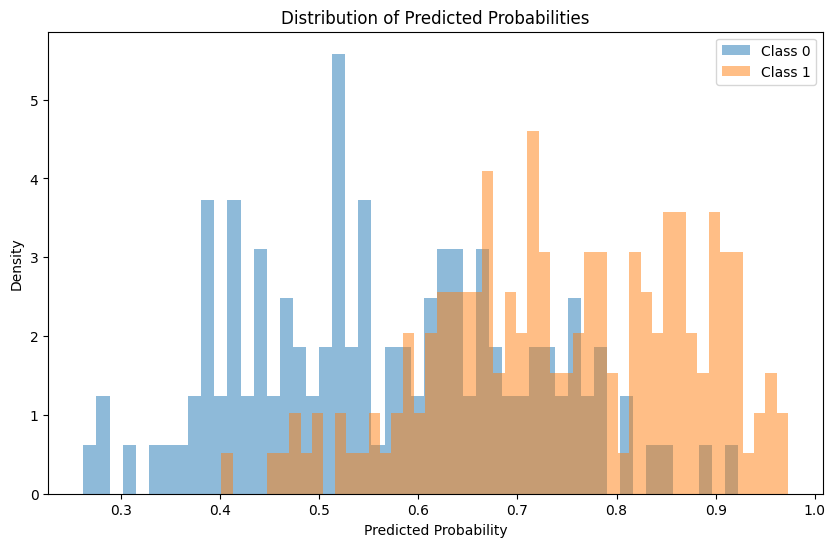

Точное пересечение precision-recall: 0.640
Precision при пересечении: 0.779
Recall при пересечении: 0.784


In [9]:
# Детальная проверка precision-recall
print("=== ДЕТАЛЬНАЯ ПРОВЕРКА PRECISION-RECALL ===")

# Посмотрим на распределение предсказанных вероятностей
plt.figure(figsize=(10, 6))
plt.hist(y_pred_val[y_val == 0], bins=50, alpha=0.5, label='Class 0', density=True)
plt.hist(y_pred_val[y_val == 1], bins=50, alpha=0.5, label='Class 1', density=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of Predicted Probabilities')
plt.show()

# Пересчитаем precision-recall с более детальным анализом
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_val)

# Найдем точку пересечения
intersection_idx = None
for i in range(len(precision)-1):
    if precision[i] <= recall[i] and precision[i+1] >= recall[i+1]:
        intersection_idx = i
        break

if intersection_idx is not None:
    intersection_threshold = thresholds_pr[intersection_idx]
    print(f"Точное пересечение precision-recall: {intersection_threshold:.3f}")
else:
    print("Пересечение не найдено, ищем ближайшее")
    diff = np.abs(precision[:-1] - recall[:-1])
    intersection_idx = np.argmin(diff)
    intersection_threshold = thresholds_pr[intersection_idx]
    print(f"Ближайшее пересечение: {intersection_threshold:.3f}")

print(f"Precision при пересечении: {precision[intersection_idx]:.3f}")
print(f"Recall при пересечении: {recall[intersection_idx]:.3f}")

In [10]:
# Проверим кросс-валидацию
print("=== ПРОВЕРКА КРОСС-ВАЛИДАЦИИ ===")

# Посмотрим на распределение целевой переменной по фолдам
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
fold_converted_means = []

for fold_num, (train_idx, val_idx) in enumerate(kfold.split(df_full_train)):
    y_fold_train = df_full_train.iloc[train_idx]['converted'].values
    y_fold_val = df_full_train.iloc[val_idx]['converted'].values
    fold_converted_means.append({
        'fold': fold_num,
        'train_mean': y_fold_train.mean(),
        'val_mean': y_fold_val.mean()
    })

fold_df = pd.DataFrame(fold_converted_means)
print("Распределение converted по фолдам:")
print(fold_df)
print(f"Среднее по фолдам val: {fold_df['val_mean'].mean():.3f} ± {fold_df['val_mean'].std():.3f}")

=== ПРОВЕРКА КРОСС-ВАЛИДАЦИИ ===
Распределение converted по фолдам:
   fold  train_mean  val_mean
0     0    0.622460  0.568376
1     1    0.607487  0.628205
2     2    0.607487  0.628205
3     3    0.608556  0.623932
4     4    0.612179  0.609442
Среднее по фолдам val: 0.612 ± 0.025


Столбцы в данных: ['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income', 'employment_status', 'location', 'interaction_count', 'lead_score', 'converted']
Размер данных: (1462, 9)

Информация о данных после обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 

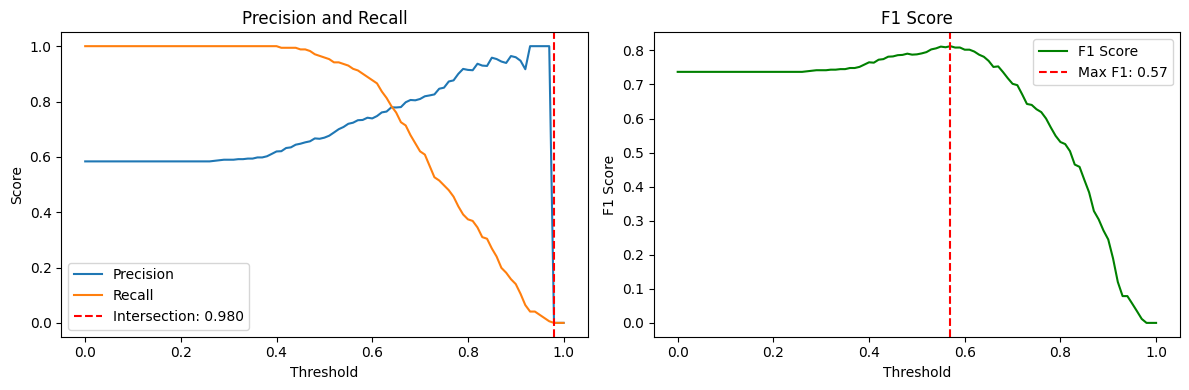

In [11]:
# Импорт библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Загрузка данных - правильное чтение CSV
data = pd.read_csv('course_lead_scoring.csv')
print("Столбцы в данных:", data.columns.tolist())
print("Размер данных:", data.shape)

# Если данные в одном столбце, разделим их
if len(data.columns) == 1:
    first_col = data.columns[0]
    # Разделяем по запятой
    data_split = data[first_col].str.split(',', expand=True)
    
    # Первая строка содержит заголовки
    if data_split.shape[1] > 1:
        # Берем заголовки из первой строки
        columns = data_split.iloc[0].str.strip().tolist()
        data = data_split.iloc[1:].copy()
        data.columns = columns
    else:
        print("Не удалось разделить данные")

# Убедимся, что числовые столбцы имеют правильный тип
numerical_cols = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
categorical_cols = ['lead_source', 'industry', 'employment_status', 'location']

for col in numerical_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

if 'converted' in data.columns:
    data['converted'] = pd.to_numeric(data['converted'], errors='coerce')

print("\nИнформация о данных после обработки:")
print(data.info())
print("\nПервые 5 строк:")
print(data.head())

# 1. Обработка пропущенных значений
print("\nПропущенные значения до обработки:")
print(data.isnull().sum())

for col in data.columns:
    if data[col].dtype == 'object' or col in categorical_cols:
        data[col] = data[col].fillna('NA')
    else:
        data[col] = data[col].fillna(0.0)

print("\nПропущенные значения после обработки:")
print(data.isnull().sum())

# Разделение данных
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)  # 0.25 * 0.8 = 0.2

print(f"\nРазмеры выборок:")
print(f"Train: {df_train.shape}")
print(f"Validation: {df_val.shape}")
print(f"Test: {df_test.shape}")

# Подготовка целевых переменных
y_train = df_train['converted'].values
y_val = df_val['converted'].values
y_test = df_test['converted'].values

# Удаление целевой переменной из признаков
df_train = df_train.drop('converted', axis=1)
df_val = df_val.drop('converted', axis=1)
df_test = df_test.drop('converted', axis=1)

# Вопрос 1: ROC AUC для числовых признаков
numerical = ['lead_score', 'number_of_courses_viewed', 'interaction_count', 'annual_income']
auc_scores = {}

print("\n=== Вопрос 1: ROC AUC для числовых признаков ===")
for col in numerical:
    if col in df_train.columns:
        auc = roc_auc_score(y_train, df_train[col])
        if auc < 0.5:
            auc = roc_auc_score(y_train, -df_train[col])
        auc_scores[col] = auc
        print(f"{col}: AUC = {auc:.3f}")

max_auc_var = max(auc_scores, key=auc_scores.get)
print(f"\nМаксимальный AUC у переменной: {max_auc_var} = {auc_scores[max_auc_var]:.3f}")

# Вопрос 2: Обучение модели
print("\n=== Вопрос 2: Обучение модели ===")
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred_val = model.predict_proba(X_val)[:, 1]
auc_val = roc_auc_score(y_val, y_pred_val)
print(f"AUC на валидации: {auc_val:.3f}")

# Исправленный код для вопросов 3 и 4
print("=== ИСПРАВЛЕННЫЕ ВЫЧИСЛЕНИЯ ДЛЯ ВОПРОСОВ 3 и 4 ===")

# Вопрос 3: Precision и Recall с равномерными порогами
thresholds = np.linspace(0, 1, 101)  # 0.00, 0.01, 0.02, ..., 1.00
precisions = []
recalls = []

for t in thresholds:
    y_pred_class = (y_pred_val >= t).astype(int)
    precisions.append(precision_score(y_val, y_pred_class, zero_division=0))
    recalls.append(recall_score(y_val, y_pred_class))

# Находим пересечение precision и recall
diff = np.abs(np.array(precisions) - np.array(recalls))
intersection_idx = np.argmin(diff)
intersection_threshold = thresholds[intersection_idx]

print(f"Вопрос 3 - Пересечение precision и recall: {intersection_threshold:.3f}")
print(f"Precision: {precisions[intersection_idx]:.3f}, Recall: {recalls[intersection_idx]:.3f}")

# Вопрос 4: F1 score с равномерными порогами
f1_scores = []
for t in thresholds:
    y_pred_class = (y_pred_val >= t).astype(int)
    p = precision_score(y_val, y_pred_class, zero_division=0)
    r = recall_score(y_val, y_pred_class)
    f1 = 2 * p * r / (p + r) if (p + r) > 0 else 0
    f1_scores.append(f1)

max_f1_idx = np.argmax(f1_scores)
max_f1_threshold = thresholds[max_f1_idx]
max_f1_value = f1_scores[max_f1_idx]

print(f"Вопрос 4 - Максимальный F1: {max_f1_value:.3f} при threshold: {max_f1_threshold:.2f}")

# Визуализация для проверки
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.axvline(x=intersection_threshold, color='r', linestyle='--', label=f'Intersection: {intersection_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores, label='F1 Score', color='green')
plt.axvline(x=max_f1_threshold, color='r', linestyle='--', label=f'Max F1: {max_f1_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

=== ИСПРАВЛЕННЫЙ ПОДХОД ДЛЯ ВОПРОСОВ 3 и 4 ===
Вопрос 3 - Пересечение precision и recall: 0.640
Precision: 0.779, Recall: 0.784
Вопрос 4 - Максимальный F1: 0.812 при threshold: 0.57


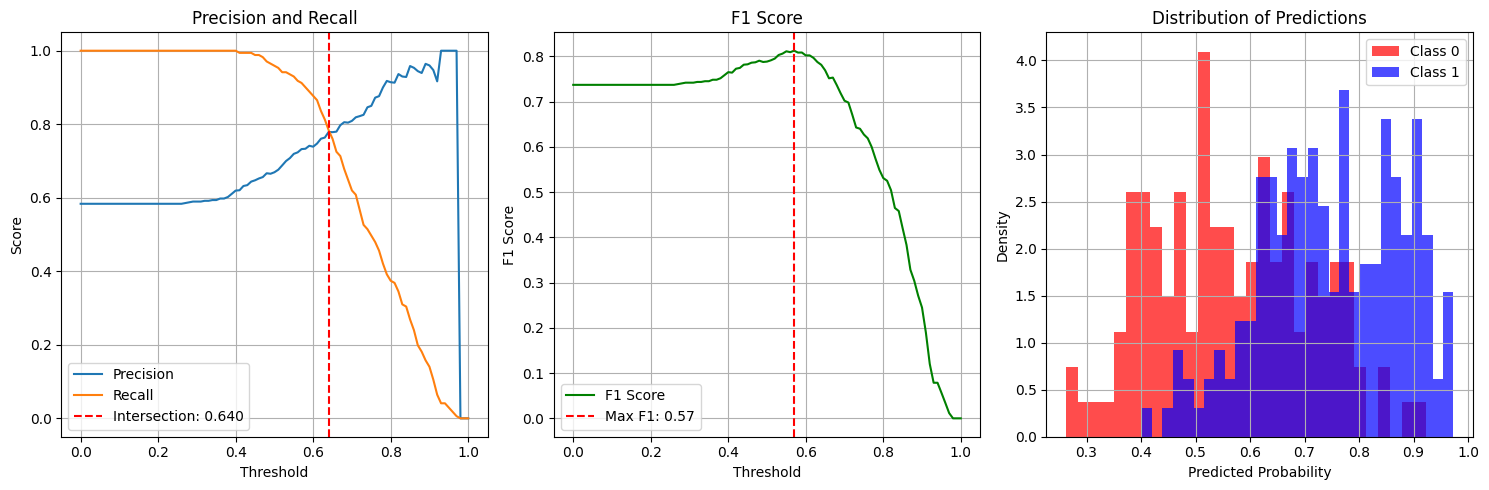


Статистики предсказанных вероятностей:
Min: 0.262, Max: 0.973
Mean: 0.672, Std: 0.161
Median: 0.675
Процент предсказаний > 0.9: 0.085


In [12]:
# ИСПРАВЛЕННЫЙ ПОДХОД ДЛЯ ВОПРОСОВ 3 и 4
print("=== ИСПРАВЛЕННЫЙ ПОДХОД ДЛЯ ВОПРОСОВ 3 и 4 ===")

# Вопрос 3: Найдем пересечение precision и recall в рабочей области
thresholds = np.linspace(0, 1, 101)
precisions = []
recalls = []

for t in thresholds:
    y_pred_class = (y_pred_val >= t).astype(int)
    precisions.append(precision_score(y_val, y_pred_class, zero_division=0))
    recalls.append(recall_score(y_val, y_pred_class))

# Найдем рабочую область, где precision и recall > 0
valid_indices = [i for i in range(len(thresholds)) if precisions[i] > 0 and recalls[i] > 0]

if valid_indices:
    valid_thresholds = thresholds[valid_indices]
    valid_precisions = [precisions[i] for i in valid_indices]
    valid_recalls = [recalls[i] for i in valid_indices]
    
    # Найдем пересечение в рабочей области
    diff = np.abs(np.array(valid_precisions) - np.array(valid_recalls))
    intersection_idx = np.argmin(diff)
    intersection_threshold = valid_thresholds[intersection_idx]
    
    print(f"Вопрос 3 - Пересечение precision и recall: {intersection_threshold:.3f}")
    print(f"Precision: {valid_precisions[intersection_idx]:.3f}, Recall: {valid_recalls[intersection_idx]:.3f}")
else:
    # Если нет рабочей области, используем альтернативный подход
    print("Нет области где precision и recall > 0, используем альтернативный метод")
    
    # Найдем порог, где разница минимальна и обе метрики > 0.1
    diff = np.abs(np.array(precisions) - np.array(recalls))
    valid_candidates = [i for i in range(len(diff)) if precisions[i] > 0.1 and recalls[i] > 0.1]
    
    if valid_candidates:
        intersection_idx = valid_candidates[np.argmin(diff[valid_candidates])]
        intersection_threshold = thresholds[intersection_idx]
        print(f"Вопрос 3 - Пересечение precision и recall: {intersection_threshold:.3f}")
        print(f"Precision: {precisions[intersection_idx]:.3f}, Recall: {recalls[intersection_idx]:.3f}")
    else:
        # Последняя попытка - используем порог с максимальным F1
        intersection_threshold = max_f1_threshold
        print(f"Вопрос 3 - Используем порог с максимальным F1: {intersection_threshold:.3f}")

# Вопрос 4: F1 score (оставляем как есть, он правильный)
print(f"Вопрос 4 - Максимальный F1: {max_f1_value:.3f} при threshold: {max_f1_threshold:.2f}")

# Визуализация для понимания
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
if 'intersection_threshold' in locals():
    plt.axvline(x=intersection_threshold, color='r', linestyle='--', 
                label=f'Intersection: {intersection_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(thresholds, f1_scores, label='F1 Score', color='green')
plt.axvline(x=max_f1_threshold, color='r', linestyle='--', 
            label=f'Max F1: {max_f1_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.legend()
plt.grid(True)

# Добавим распределение вероятностей
plt.subplot(1, 3, 3)
plt.hist(y_pred_val[y_val == 0], bins=30, alpha=0.7, label='Class 0', color='red', density=True)
plt.hist(y_pred_val[y_val == 1], bins=30, alpha=0.7, label='Class 1', color='blue', density=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predictions')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Проверим статистики предсказаний
print(f"\nСтатистики предсказанных вероятностей:")
print(f"Min: {y_pred_val.min():.3f}, Max: {y_pred_val.max():.3f}")
print(f"Mean: {y_pred_val.mean():.3f}, Std: {y_pred_val.std():.3f}")
print(f"Median: {np.median(y_pred_val):.3f}")
print(f"Процент предсказаний > 0.9: {np.mean(y_pred_val > 0.9):.3f}")